In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"D:\VOIS Project\Netflix Dataset.csv"
df = pd.read_csv(file_path)

# Preview the first 5 rows
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [2]:
# Check shape and columns
print("Dataset Shape:", df.shape)
print("Columns:", df.columns)

# Check data types and missing values
df.info()
df.isnull().sum()

Dataset Shape: (7789, 11)
Columns: Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [3]:
# 1. Fill missing values
df['Director'].fillna('Unknown', inplace=True)
df['Cast'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)
df['Release_Date'].fillna('2008-01-01', inplace=True)  # Fill with earliest year if missing
df['Rating'].fillna('Not Rated', inplace=True)

# 2. Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# 3. Extract Release Year from Release_Date
df['Release_Year'] = df['Release_Date'].dt.year

# 4. Clean Duration column (extract numeric value)
def extract_duration(value):
    if 'Season' in value:
        return int(value.split()[0])  # For TV Shows
    elif 'min' in value:
        return int(value.split()[0])  # For Movies
    else:
        return np.nan

df['Duration_Num'] = df['Duration'].apply(extract_duration)

# 5. Standardize Genre/Category column
df.rename(columns={'Category': 'Genre'}, inplace=True)

# 6. Quick check after cleaning
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7789 non-null   object        
 1   Genre         7789 non-null   object        
 2   Title         7789 non-null   object        
 3   Director      7789 non-null   object        
 4   Cast          7789 non-null   object        
 5   Country       7789 non-null   object        
 6   Release_Date  7691 non-null   datetime64[ns]
 7   Rating        7789 non-null   object        
 8   Duration      7789 non-null   object        
 9   Type          7789 non-null   object        
 10  Description   7789 non-null   object        
 11  Release_Year  7691 non-null   float64       
 12  Duration_Num  7789 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 791.2+ KB


C:\Users\iassu\AppData\Local\Temp\ipykernel_4844\4206945637.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Director'].fillna('Unknown', inplace=True)
C:\Users\iassu\AppData\Local\Temp\ipykernel_4844\4206945637.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

,Show_Id,Genre,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year,Duration_Num
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,4
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,93
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,78
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,80
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,123


C:\Users\iassu\AppData\Local\Temp\ipykernel_4844\233518622.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Type', palette='pastel')


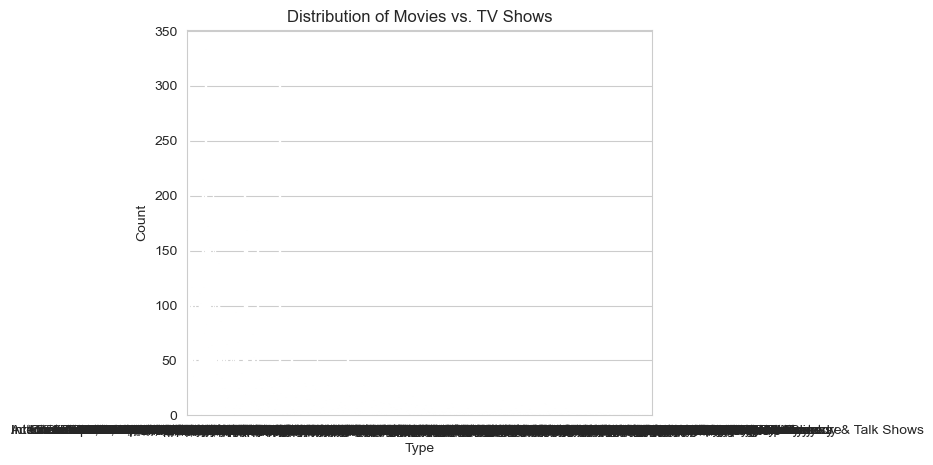

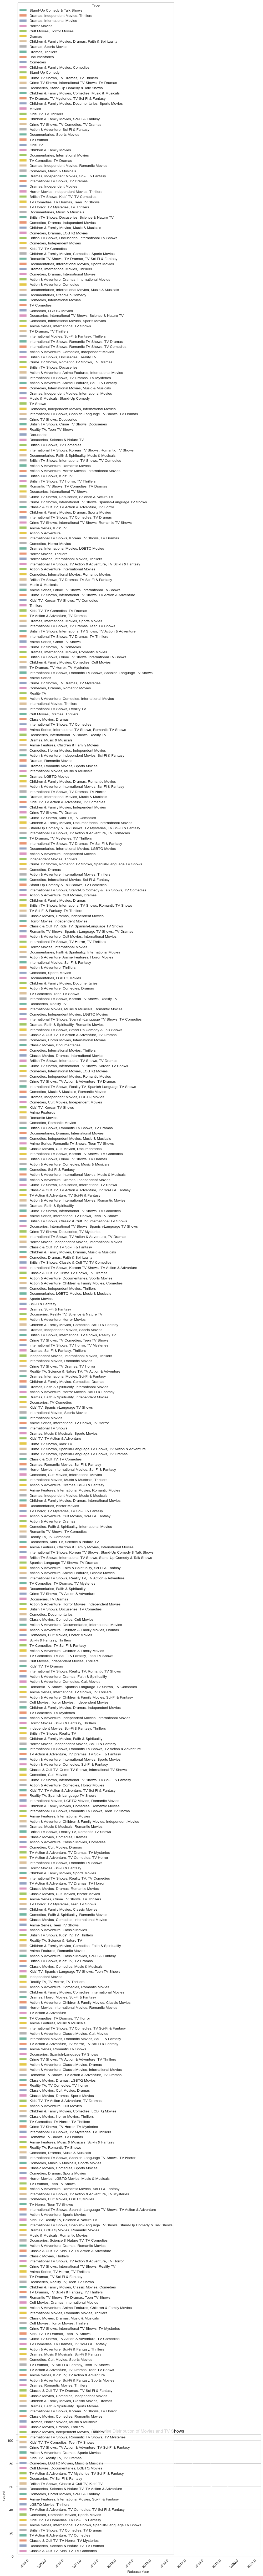

C:\Users\iassu\AppData\Local\Temp\ipykernel_4844\233518622.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='mako')


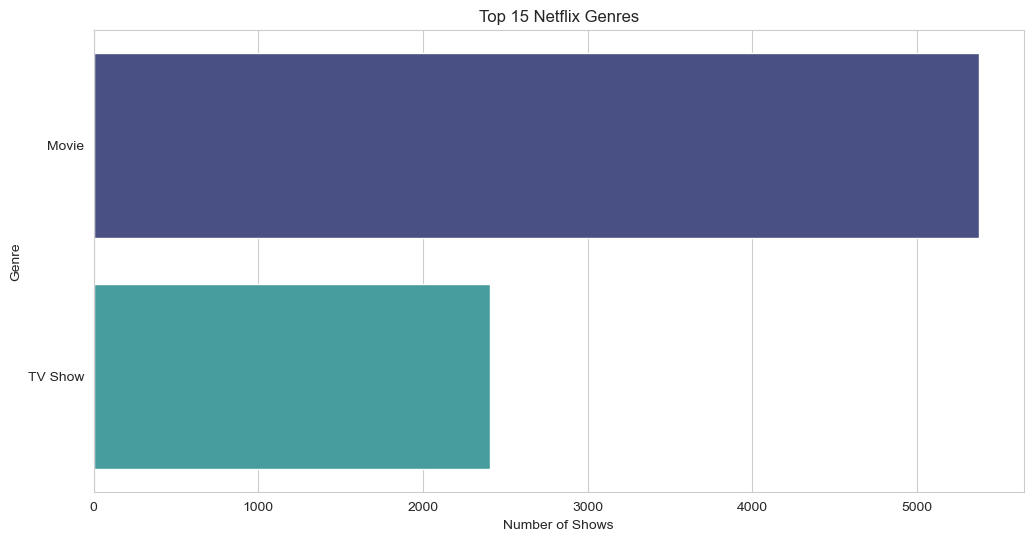

C:\Users\iassu\AppData\Local\Temp\ipykernel_4844\233518622.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


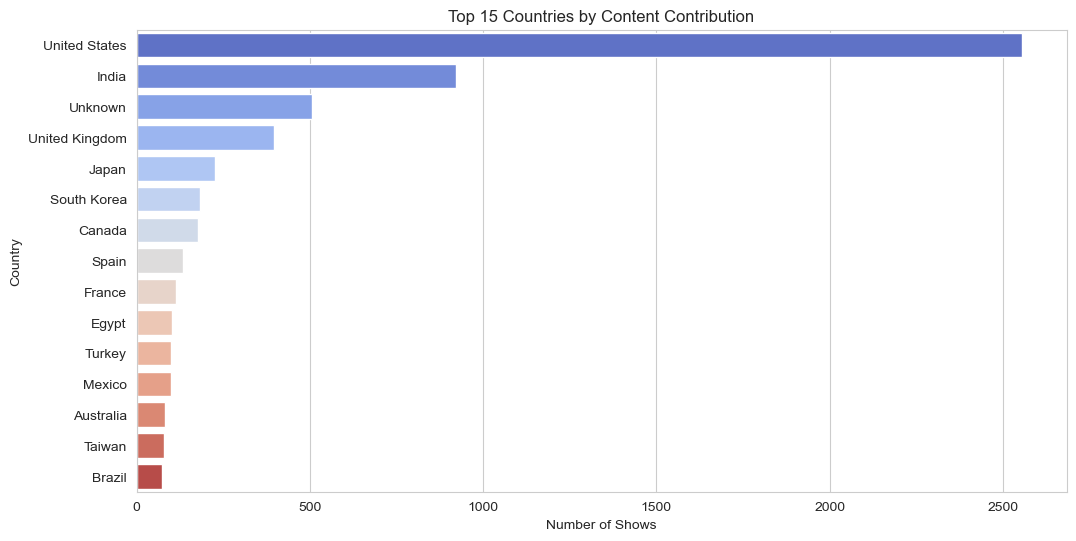

C:\Users\iassu\AppData\Local\Temp\ipykernel_4844\233518622.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Rating', order=df['Rating'].value_counts().index, palette='viridis')


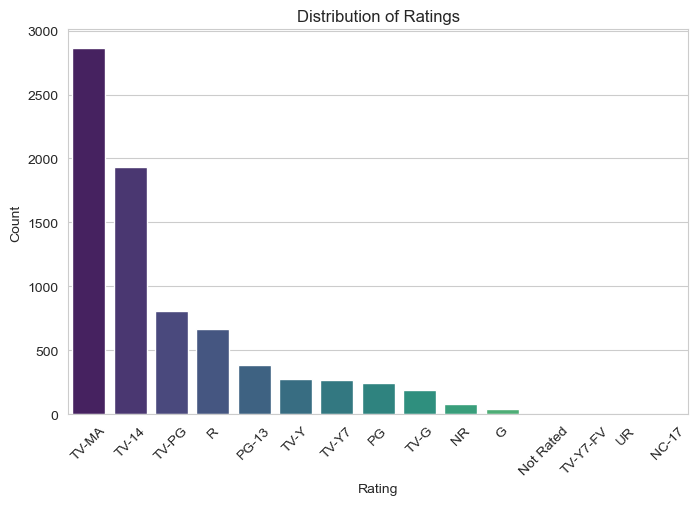

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')

# 1. Distribution of Movies vs. TV Shows
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='Type', palette='pastel')
plt.title('Distribution of Movies vs. TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# 2. Year-wise content trends (Movies vs TV Shows)
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Release_Year', hue='Type', palette='Set2')
plt.title('Year-wise Distribution of Movies and TV Shows')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

# 3. Most common Genres
plt.figure(figsize=(12,6))
top_genres = df['Genre'].value_counts().nlargest(15)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='mako')
plt.title('Top 15 Netflix Genres')
plt.xlabel('Number of Shows')
plt.ylabel('Genre')
plt.show()

# 4. Country-wise contributions (Top 15 countries)
plt.figure(figsize=(12,6))
top_countries = df['Country'].value_counts().nlargest(15)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 15 Countries by Content Contribution')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.show()

# 5. Rating distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Rating', order=df['Rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [5]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans

# Split genres into lists
df['Genre_List'] = df['Genre'].apply(lambda x: [g.strip() for g in x.split(',')])

# One-hot encode genres
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['Genre_List'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)

# Optional: Add Release_Year as a feature
genre_df['Release_Year'] = df['Release_Year'].fillna(2008)

In [6]:
# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(genre_df)

# Check cluster distribution
df['Cluster'].value_counts()

C:\Users\iassu\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\iassu\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\iassu\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\iassu\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

Cluster
4    2899
0    1770
1    1746
3    1255
2     119
Name: count, dtype: int64

In [7]:
# Top genres per cluster
for i in range(5):
    cluster_genres = genre_df[df['Cluster'] == i].sum().sort_values(ascending=False)
    print(f"\nCluster {i} Top Genres:\n", cluster_genres.head(10))


Cluster 0 Top Genres:
 Release_Year    3573978.0
TV Show            1770.0
Movie                 0.0
dtype: float64

Cluster 1 Top Genres:
 Release_Year    3520980.0
Movie              1205.0
TV Show             541.0
dtype: float64

Cluster 2 Top Genres:
 Release_Year    239007.0
TV Show             99.0
Movie               20.0
dtype: float64

Cluster 3 Top Genres:
 Release_Year    2532590.0
Movie              1255.0
TV Show               0.0
dtype: float64

Cluster 4 Top Genres:
 Release_Year    5854570.0
Movie              2899.0
TV Show               0.0
dtype: float64


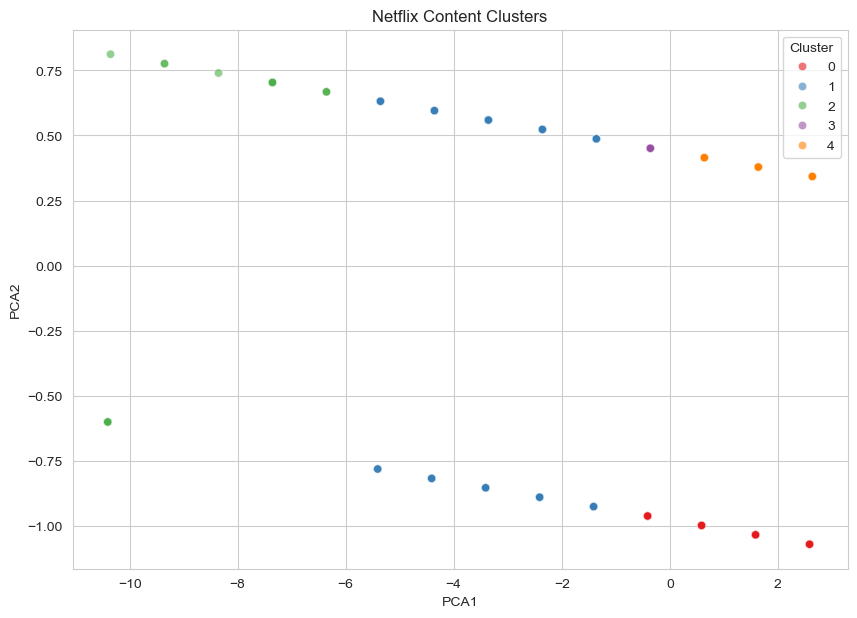

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(genre_df)
df['PCA1'] = pca_result[:,0]
df['PCA2'] = pca_result[:,1]

plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', alpha=0.6)
plt.title('Netflix Content Clusters')
plt.show()